In [1]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [7]:
from statsmodels.tsa.stattools import acf

In [2]:
df = pd.read_excel(r'C:\Users\tunag\Desktop\Python\Model_TimeSeries\AirPassengers.xlsx')

# 手动ARIMA

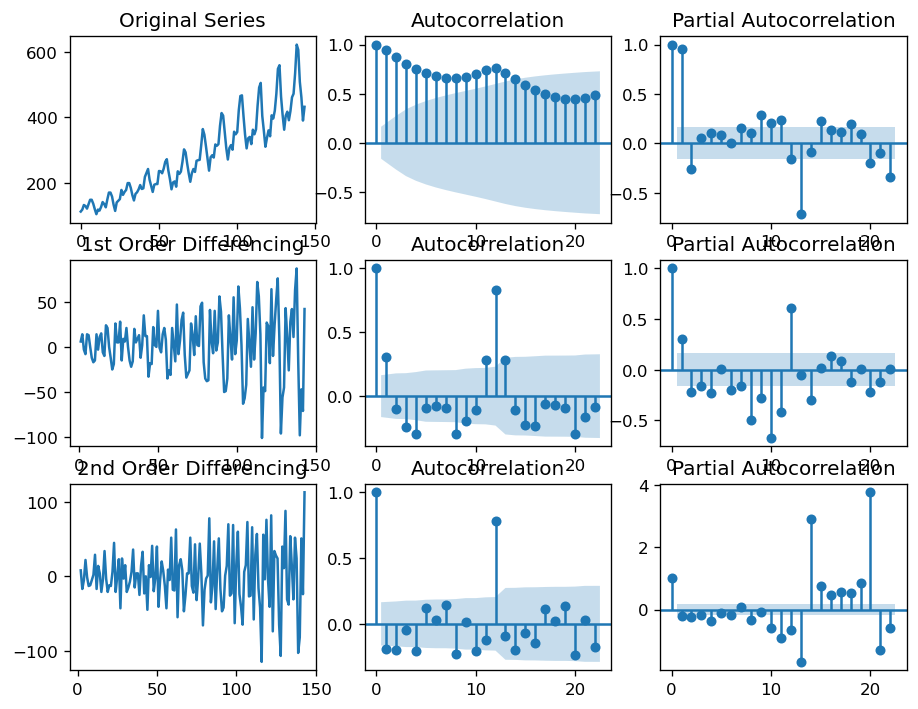

In [3]:
#决定拆分阶数
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3,3)
axes[0,0].plot(df.passengerCount);axes[0,0].set_title('Original Series')
plot_acf(df.passengerCount, ax=axes[0,1])
plot_pacf(df.passengerCount, ax=axes[0,2])

# 1st Differencing
axes[1, 0].plot(df.passengerCount.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.passengerCount.diff().dropna(), ax=axes[1, 1])
plot_pacf(df.passengerCount.diff().dropna(), ax=axes[1,2])

# 2nd Differencing
axes[2, 0].plot(df.passengerCount.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.passengerCount.diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(df.passengerCount.diff().diff().dropna(), ax=axes[2,2])

plt.show()

In [4]:
from statsmodels.tsa.arima_model import ARIMA# 2,1,1 ARIMA Model
model = ARIMA(df.passengerCount, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.passengerCount   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Sat, 18 Jun 2022   AIC                           1361.696
Time:                        15:20:07   BIC                           1376.510
Sample:                             1   HQIC                          1367.716
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.passengerCount     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L

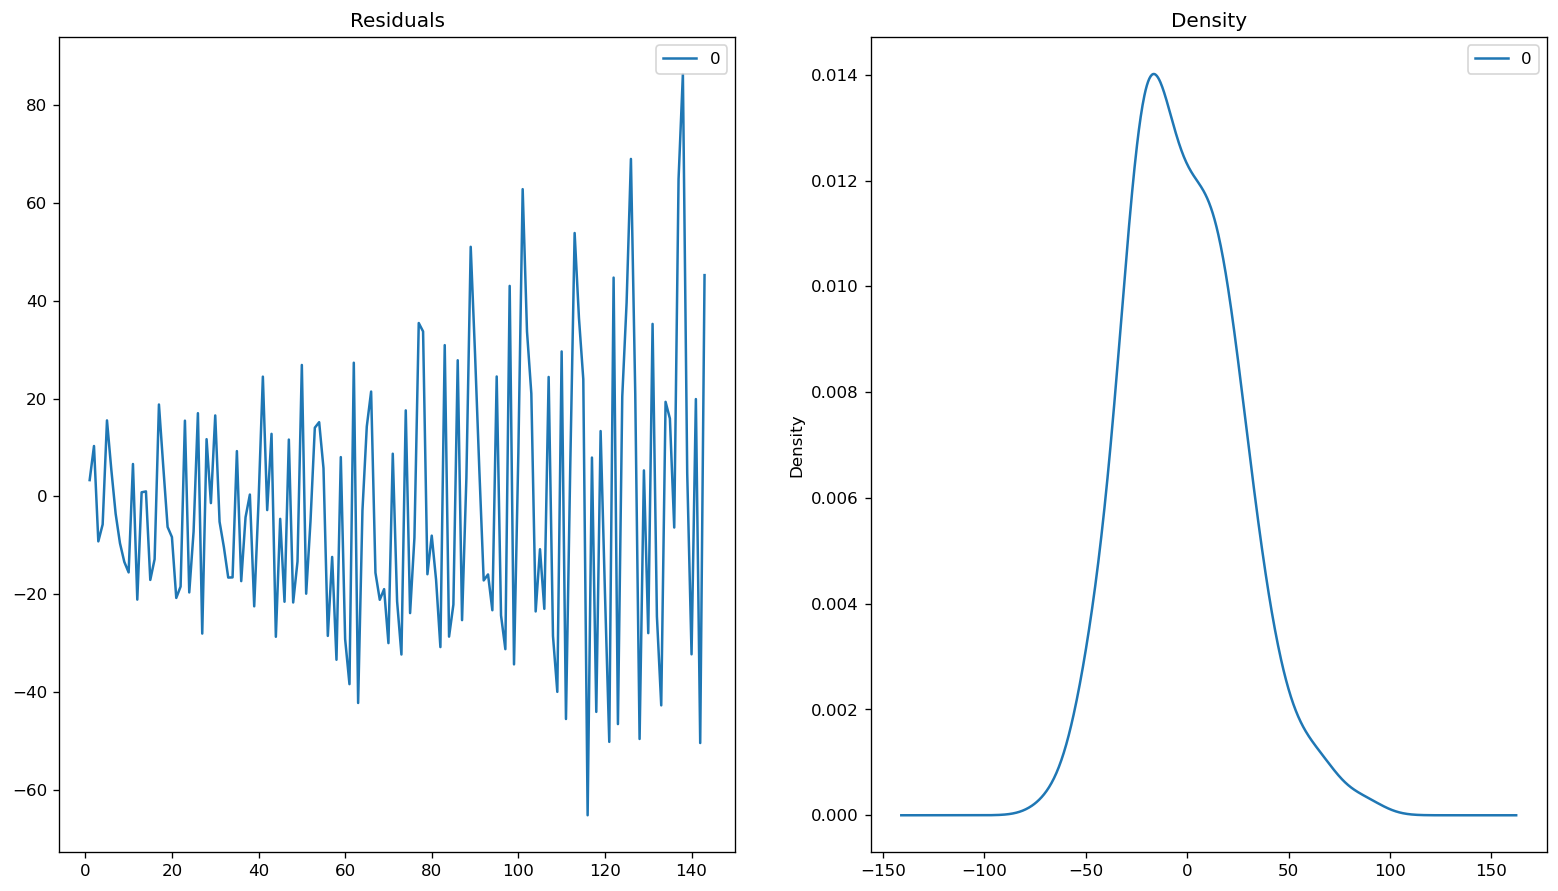

In [5]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

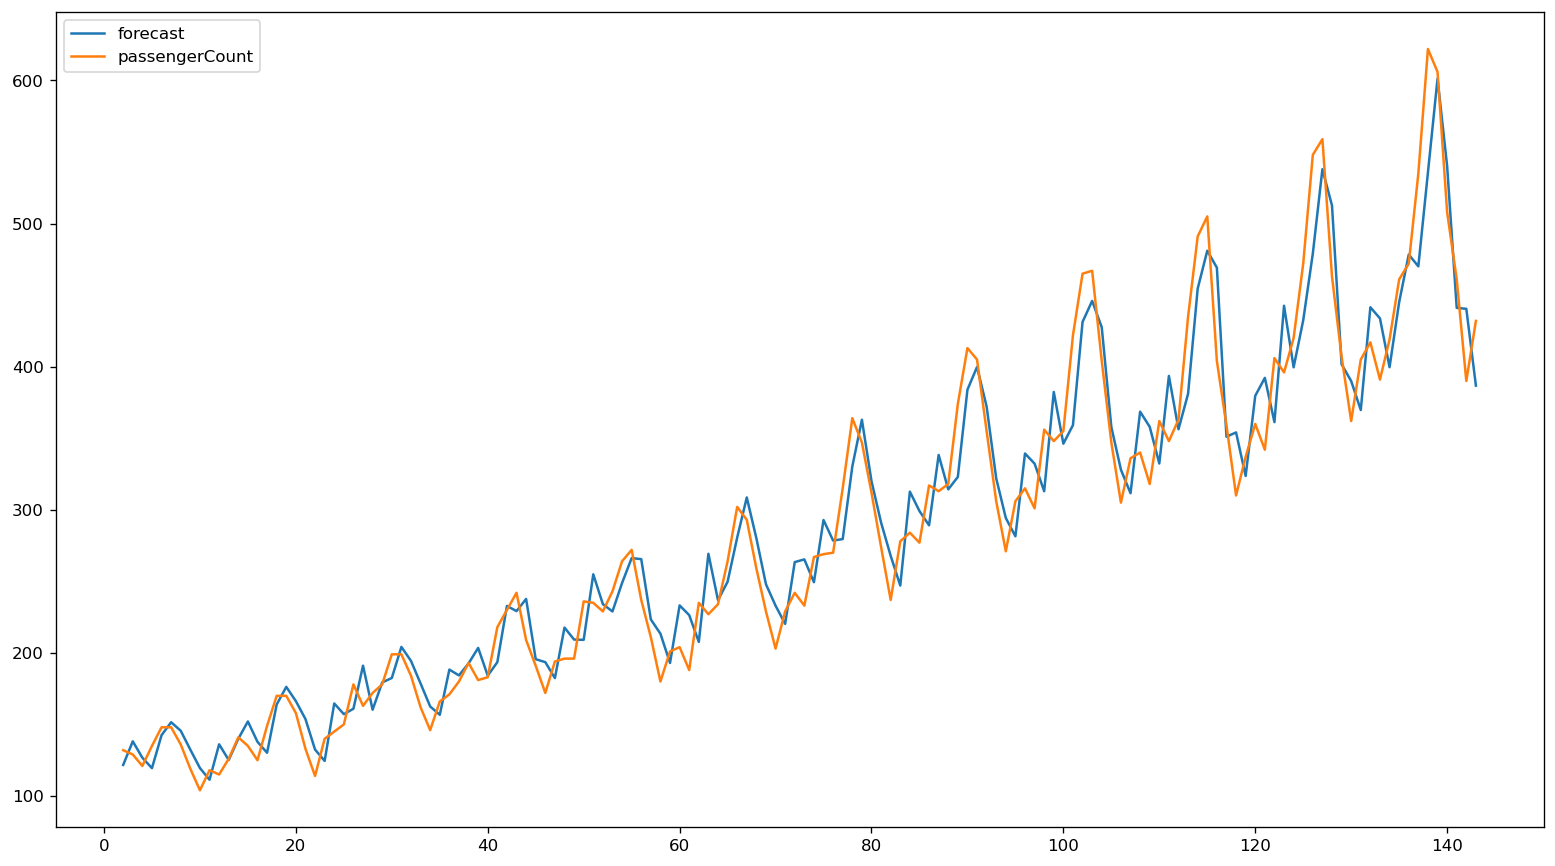

In [6]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [9]:
# Create Training and Test
train = df.passengerCount[:100]
test = df.passengerCount[100:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

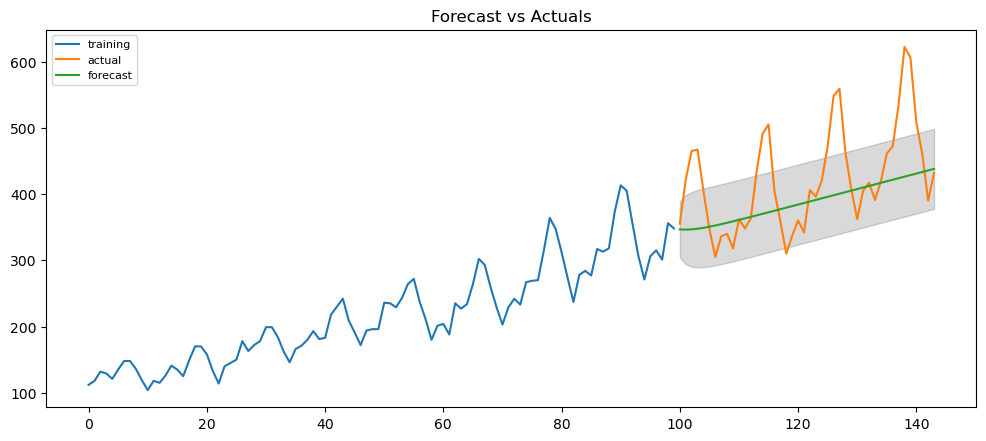

In [11]:
# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 自动ARIMA

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.passengerCount, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

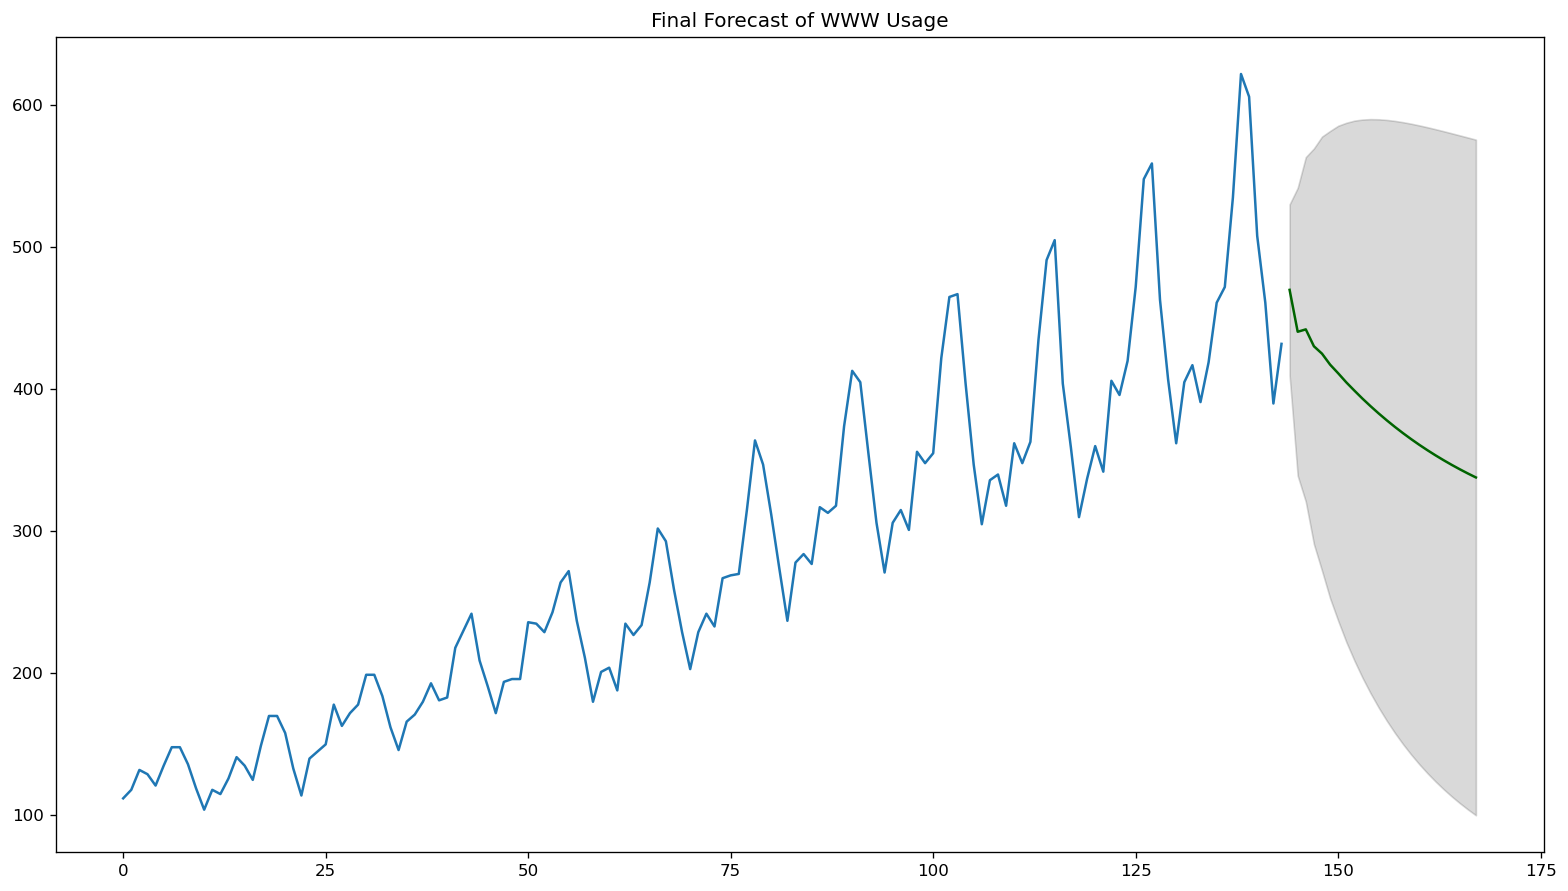

In [13]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.passengerCount), len(df.passengerCount)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.passengerCount)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

# SARIMA

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1920x1080 with 0 Axes>

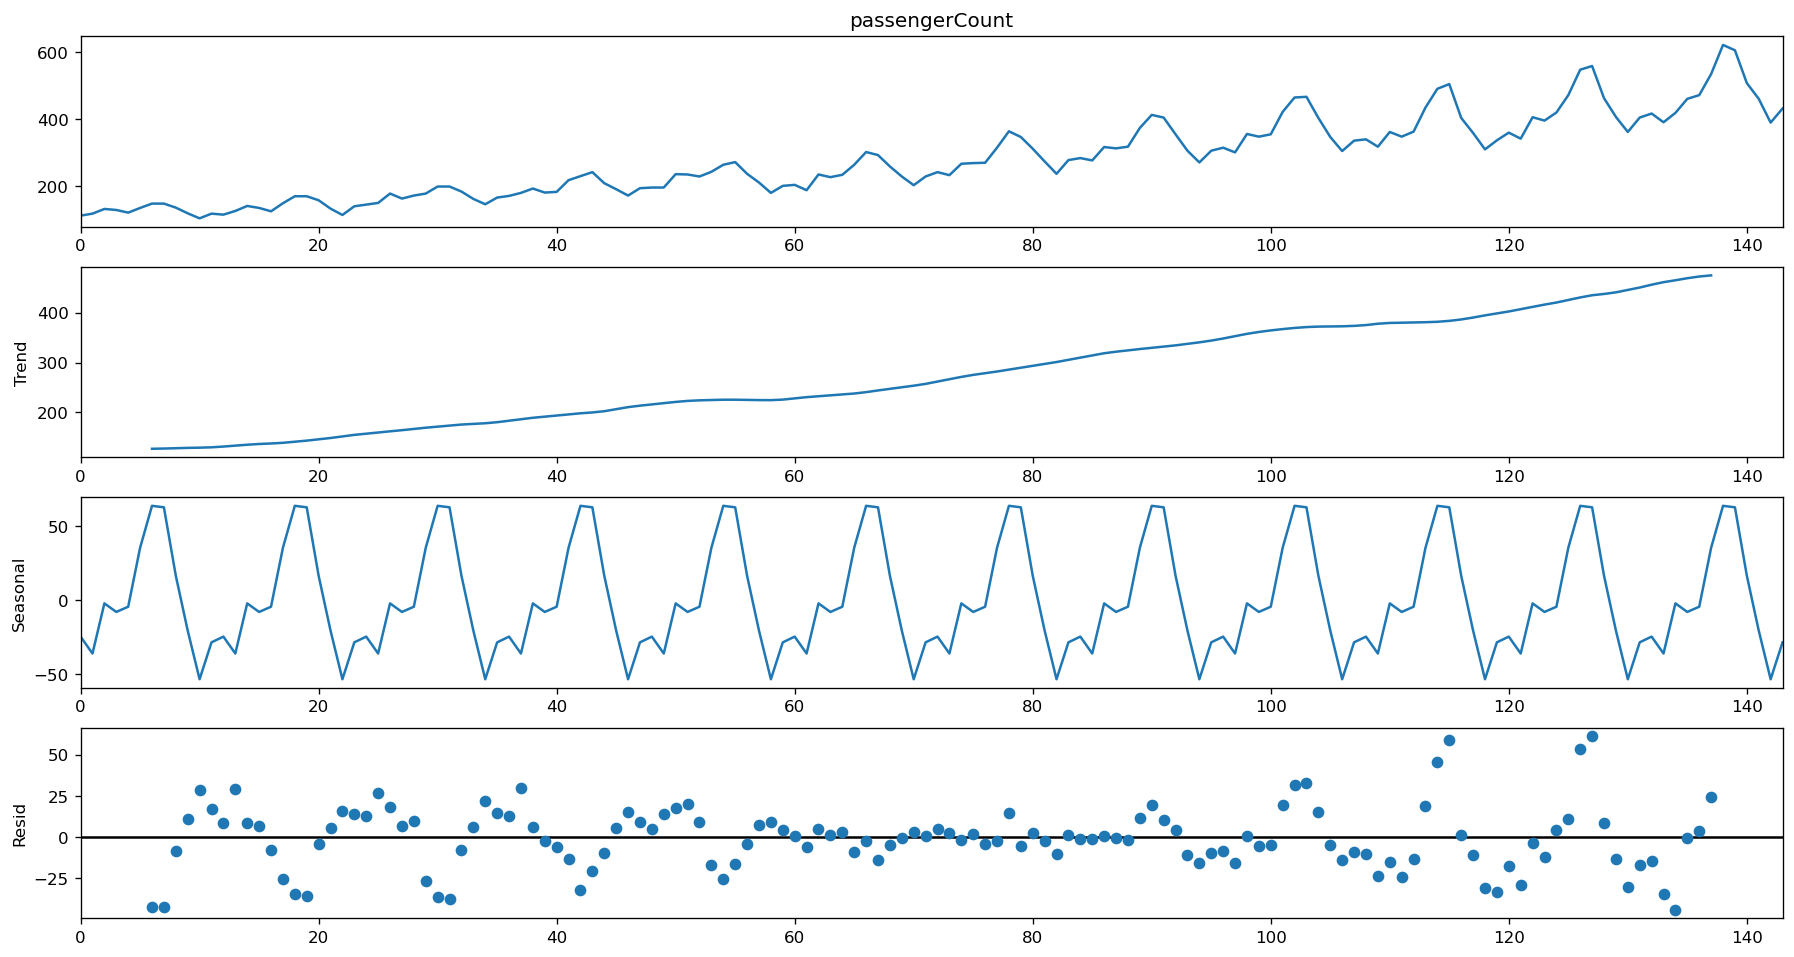

In [17]:
decomposition = seasonal_decompose(df.passengerCount, freq=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)  

In [15]:
smodel = pm.auto_arima(df.passengerCount, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.35 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sat, 18 Jun 2022   AIC                           1019.178
Time:                                     15:27:33   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

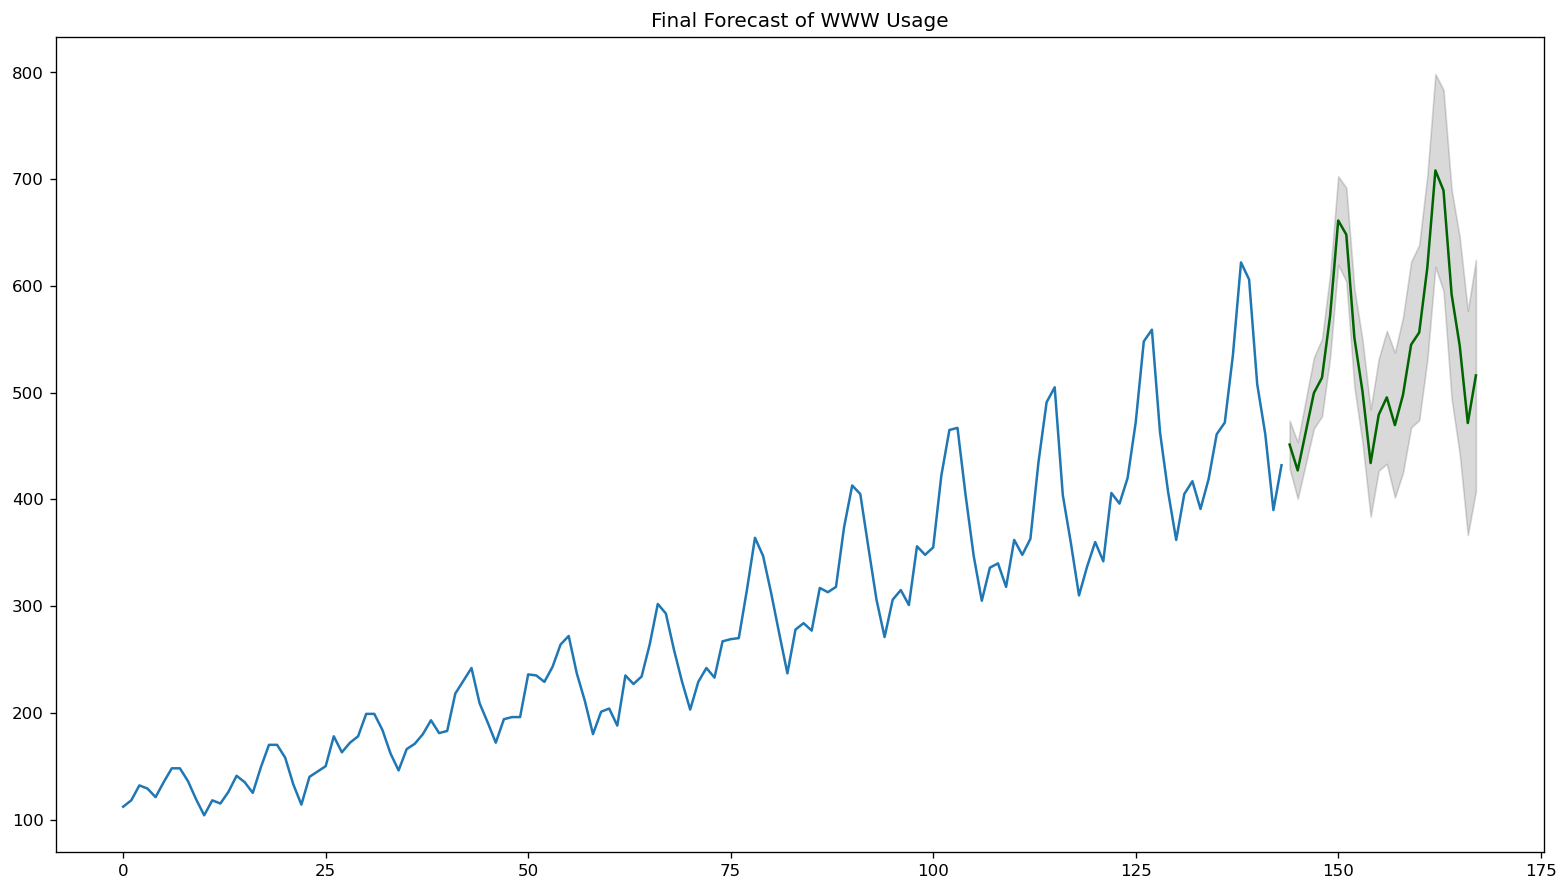

In [18]:
# Forecast
n_periods = 24
fc, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.passengerCount), len(df.passengerCount)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.passengerCount)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()